# Loan Approval/Eligibility Problem

## 1. Problem Definition
In a statement,
> we will build an automated machine learning model to predict the repaying capacity of applicants.


## 2. Evaluation
> To achieve a passing grade, the accuracy of the model has to be at least 70%

## 3. Features
Here, we get to see different information about each of the features in the data.

**Create data dictionary**

1. Loan ID: A unique identifier for the loan information.
2. Customer ID: A unique identifier for the loan customer.
3. Loan Status: A categorical variable indicating if the loan was given to the customer.
4. Current Loan Amount: This is the loan amount that was either completely paid off, or the amount that was defaulted. This data is for previous loan.
5. Term: A categorical variable indicating if it is a short term or long term loan.
6. Credit Score: A value between 0 and 800 indicating the riskiness of the borrower's credit history.
7. Years in current job: A categorical variable indicating how many years the customer has been in current job.
8. Home Ownership: Categorical variable indicating howme ownership. Values are "Rent", "Home Mortgage", and "Own". If the value is OWN, then the customer is a home owner with no mortgage.
9. Annual Income: The customer's annual invome.
10. Purpose: A description of the purpose of the loan.
11. Monthly Debt: The customer's monthly payment for their existing loans
12. Years of Credit History: The years since the first entry in the customer's credit history.
13. Months since last delinquent: Months since the last loan deliquent payment.
14. Number of open accounts: The total number of open credit cards
15. Number of Credit Problems: The number of credit problems in the customer records.
16. Current Credit Balance: The current total debt for the customer.
17. Maximum Open Credit: The maximum credit limit for all credit sources.
18. Bankruptcies: The number of bankrupt
19. Tax Liens: The number of tax liens.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [2]:
df = pd.read_csv("LoansTrainingSetV2.csv", low_memory=False)
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Loan Refused,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Loan Refused,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Loan Refused,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Loan Refused,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Loan Refused,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [3]:
df.head().T

,0,1,2,3,4
Loan ID,6cf51492-02a2-423e-b93d-676f05b9ad53,552e7ade-4292-4354-9ff9-c48031697d72,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,1450910f-9495-4fc9-afaf-9bdf4b9821df
Customer ID,7c202b37-2add-44e8-9aea-d5b119aea935,e7217b0a-07ac-47dd-b379-577b5a35b7c6,0a62fc41-16c8-40b5-92ff-9e4b763ce714,30f36c59-5182-4482-8bbb-5b736849ae43,70c26012-bba5-42c0-8dcb-75295ada31bb
Loan Status,Loan Refused,Loan Refused,Loan Refused,Loan Refused,Loan Refused
Current Loan Amount,12232,25014,16117,11716,9789
Term,Short Term,Long Term,Short Term,Short Term,Long Term
Credit Score,7280.0,7330.0,7240.0,7400.0,6860.0
Years in current job,< 1 year,10+ years,9 years,3 years,10+ years
Home Ownership,Rent,Home Mortgage,Home Mortgage,Rent,Home Mortgage
Annual Income,46643.0,81099.0,60438.0,34171.0,47003.0
Purpose,Debt Consolidation,Debt Consolidation,Home Improvements,Debt Consolidation,Home Improvements


In [4]:
df.shape

(111107, 19)

In [5]:
len(df)

111107

### Exploratory Data Analysis(EDA)

In [6]:
df.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      228
Tax Liens                          11
dtype: int64

In [7]:
# Drop the duplicates with respect to LOAN ID
df.drop_duplicates(subset="Loan ID", keep="first", inplace=True)
df.shape

(88910, 19)

In [8]:
status = df["Loan Status"].value_counts()

C:\Users\oabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


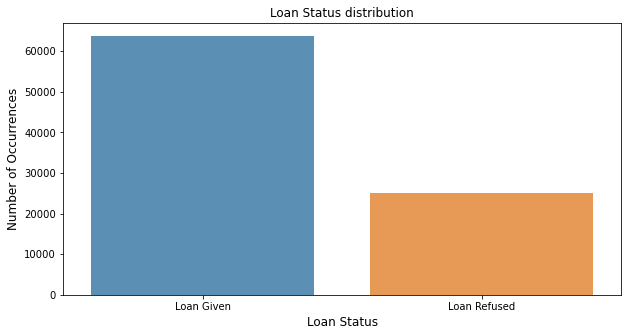

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(status.index, status.values, alpha=0.8)
plt.title('Loan Status distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Loan Status', fontsize=12)
plt.show()

### Removing Outliers

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,88910.0,1.433878e+07,3.502996e+07,491.0,8283.0,14355.0,24485.00,99999999.0
Credit Score,67572.0,1.199200e+03,1.680814e+03,585.0,714.0,733.0,744.00,7510.0
Annual Income,67572.0,7.234575e+04,5.836101e+04,4033.0,44586.0,61494.0,86750.25,8713547.0
Years of Credit History,88910.0,1.831531e+01,7.049175e+00,3.6,13.5,17.0,21.80,70.5
Months since last delinquent,40404.0,3.508029e+01,2.200858e+01,0.0,16.0,32.0,51.00,176.0
Number of Open Accounts,88910.0,1.111035e+01,4.978461e+00,0.0,8.0,10.0,14.00,76.0
Number of Credit Problems,88910.0,1.604769e-01,4.737460e-01,0.0,0.0,0.0,0.00,15.0
Current Credit Balance,88910.0,1.543593e+04,1.965873e+04,0.0,5949.0,11039.0,19301.00,1730472.0
Bankruptcies,88718.0,1.126716e-01,3.433000e-01,0.0,0.0,0.0,0.00,7.0
Tax Liens,88902.0,2.822209e-02,2.575327e-01,0.0,0.0,0.0,0.00,15.0


## Current Loan Amount

In [13]:
df['Current Loan Amount'].describe().T

count    8.891000e+04
mean     1.433878e+07
std      3.502996e+07
min      4.910000e+02
25%      8.283000e+03
50%      1.435500e+04
75%      2.448500e+04
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

The percentile are quite high. 25%, 50%, 75% is raise to the power of 4 and the max is raised to the power of 8. So we need to remove the outliers.

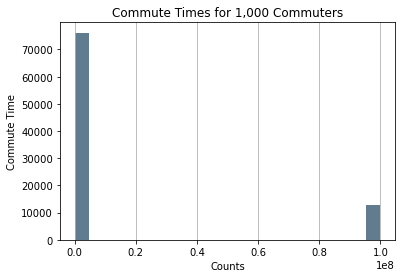

In [14]:
df["Current Loan Amount"].plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

In [15]:
Q1 = df["Current Loan Amount"].quantile(0.25)
Q3 = df["Current Loan Amount"].quantile(0.75)
IQR = Q3 - Q1

In [16]:
df["Current Loan Amount"][((df["Current Loan Amount"] < (Q1 - 1.5 * IQR)) |(df["Current Loan Amount"] > (Q3 + 1.5 * IQR)))]

5044     99999999
5045     99999999
5046     99999999
5047     99999999
5048     99999999
           ...   
17777    99999999
17778    99999999
17779    99999999
17780    99999999
17781    99999999
Name: Current Loan Amount, Length: 12738, dtype: int64

<AxesSubplot:ylabel='Frequency'>

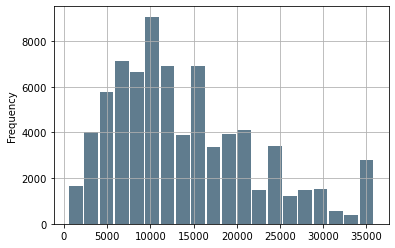

In [17]:
# Filling by a single value
temp = np.array(df["Current Loan Amount"].values.tolist())

# Converted all of the outliers into NAN
df["Current Loan Amount_temp"] = np.where(temp > 9999998, 'NaN', temp).tolist()


temp = df["Current Loan Amount_temp"][df["Current Loan Amount_temp"]!='NaN'].astype(str).astype(int)
temp.plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e');

In [18]:
temp.describe()

count    76172.000000
mean     13933.915756
std       8235.921922
min        491.000000
25%       7810.000000
50%      12038.000000
75%      19351.000000
max      35875.000000
Name: Current Loan Amount_temp, dtype: float64

In [19]:
# Replacing the data with 50% percentile(12038) instead of NAN
temp = np.array(df["Current Loan Amount"].values.tolist())
df["Current Loan Amount"] = np.where(temp > 9999998, 12038, temp).tolist()

# Dropping the NAN Column
df = df.drop(['Current Loan Amount_temp'],axis=1)

In [20]:
df.shape

(88910, 19)

## Term Column

C:\Users\oabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


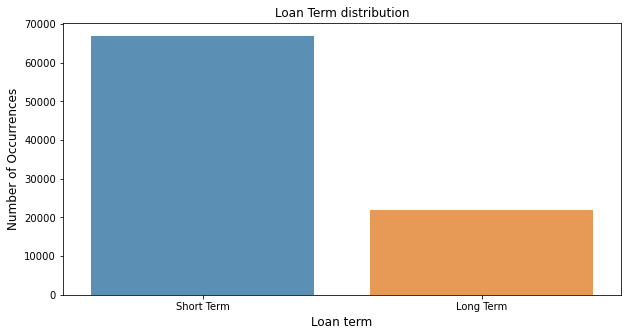

In [21]:
status = df["Term"].value_counts() 

plt.figure(figsize=(10,5))
sns.barplot(status.index, status.values, alpha=0.8)
plt.title('Loan Term distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Loan term', fontsize=12)
plt.show()

The data doesn't have any issues like missing values or outliers so we do not need to work on it

## Credit Score

In [25]:
df["Credit Score"].describe()

count    67572.000000
mean      1199.199580
std       1680.813805
min        585.000000
25%        714.000000
50%        733.000000
75%        744.000000
max       7510.000000
Name: Credit Score, dtype: float64

Max is 7510. The credit scores ranges from 0-800, so the max value shown is not possible

In [24]:
df["Credit Score"].isnull().unique()

array([False,  True])

In [25]:
# Let us firstly divide the values greater than 800 by 10
df["Credit Score"] = np.where(df["Credit Score"]>800, 
                              df["Credit Score"]/10, 
                              df["Credit Score"])

In [26]:
# Now lets replace the missing values with median 
median_score = statistics.median(df["Credit Score"])

C:\Users\oabas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


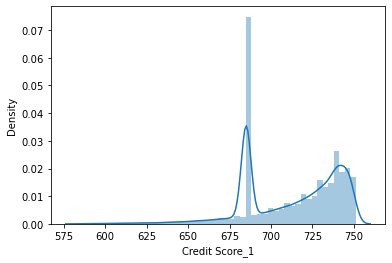

In [27]:
df["Credit Score_1"] = df["Credit Score"]
df["Credit Score_1"].fillna(median_score, inplace = True) 

sns.distplot(df["Credit Score_1"]);

As we can see this data is skewed so when we replace it with median it is giving us problems.

C:\Users\oabas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


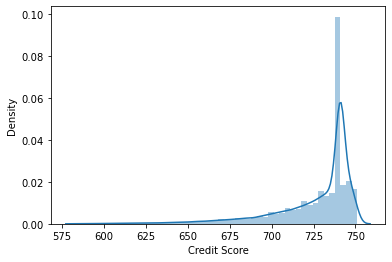

In [28]:
# Replacing with 75th percentile and taking log we get a better distribution
df["Credit Score"].fillna(741, inplace = True) 

sns.distplot(df["Credit Score"]);

C:\Users\oabas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


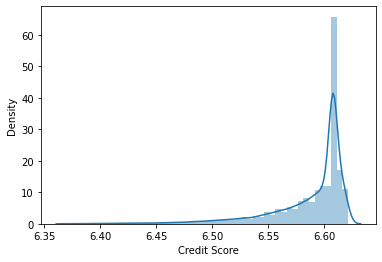

In [29]:
sns.distplot(np.log(df["Credit Score"]));

## Home Ownership

In [30]:
df['Home Ownership'].unique()

array(['Rent', 'Home Mortgage', 'Own Home', 'HaveMortgage'], dtype=object)

We have 4 unique values which makes no sense, cause we should only have 3 unique values 'Rent', 'HomeMortgage', 'Own Home'. As a result 'HaveMortgage' doesn't have any businees here, so we going to merge it with the 'HomeMortgage'

In [31]:
df['Home Ownership'] = df['Home Ownership'].str.replace('HaveMortgage', 'Home Mortgage', regex=True)

In [32]:
df['Home Ownership'].unique()

array(['Rent', 'Home Mortgage', 'Own Home'], dtype=object)

## Annual Income

In [33]:
df['Annual Income'].describe()

count    6.757200e+04
mean     7.234575e+04
std      5.836101e+04
min      4.033000e+03
25%      4.458600e+04
50%      6.149400e+04
75%      8.675025e+04
max      8.713547e+06
Name: Annual Income, dtype: float64

Max value seems pretty high

In [34]:
df['Annual Income'].quantile([.2,0.75,0.90,.95,0.99,.999])

0.200     40764.00
0.750     86750.25
0.900    119916.00
0.950    147645.00
0.990    239286.96
0.999    491575.77
Name: Annual Income, dtype: float64

As we can see the highest values was present in the 99th quantile of the data, which is an outlier. Lets replace them with the 95th percentile value which is 147645

In [35]:
df.loc[df['Annual Income'] > 147645, 'Annual Income'] = 147645

In [36]:
df['Annual Income'].describe()

count     67572.000000
mean      71131.756615
std       39199.679887
min        4033.000000
25%       44586.000000
50%       61494.000000
75%       86750.250000
max      239287.000000
Name: Annual Income, dtype: float64

In [37]:
df['Annual Income'].isna().sum()

21338

## Monthly Debt